In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
sys.path.append(r'G:\Grid_Orientation\LISFLOOD_FP\Analysis\Modules')

In [2]:
import matplotlib.pyplot as plt                           # For plotting
import seaborn as sns                                     # For plotting
import pandas as pd                                       # For reading data

from analysis_comparison import get_datalist, \
                                statistic_df_dict, \
                                kdeplots, \
                                kdeplots_vers2, \
                                boxplots                  # For getting and plotting data
from savePlot import save_plot                            # For saving plots

In [3]:
path_boxplot = "S:\\LISFLOOD\\boxplot"
path_density = "S:\\LISFLOOD\\density"

In [4]:
# Building path
building_path = r"S:\LISFLOOD\buildings\nz-building-outlines-all-sources.shp"

-------------------------------------------------------------------------------------------------------------------------------

# Transformation comparison - boxplot

In [ ]:
file_list = [
    r"S:\\LISFLOOD\\version_12\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_17\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_7\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_8\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_9\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv"
][::-1]

impact_version_list = [
    r"S:\\LISFLOOD\\version_12\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_17\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_7\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_8\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_9\\7_results\\un_combination\\uncom_one_polygon"
][::-1]

transformation_list = [10, 10, 10, 10, 10]

name = [
    'combination',
    'rotation',
    'north - east translation',
    'east translation',
    'north translation',
][::-1]

transformation_datasets = get_datalist(
    file_list,
    "c",
    transformation_list,
    0.1,
    building_path,
    impact_version_list,
    False
)

In [ ]:
transformation_comparison = statistic_df_dict(
    name,
    transformation_datasets,
    -999
)

In [ ]:
boxplot_color_dict = {"north translation": 'blueviolet',
                      "east translation": 'orange',
                      "north - east translation": 'dodgerblue',
                      "rotation": 'darkgreen',
                      "combination": 'deeppink'}

comparison_type_transform = 'Transformations'
dpi=300

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "mean\nof water depth of each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'mean',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\mean_transformation.png', bbox_inches='tight', dpi=50)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "standard deviation\n of water depth of each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'sd',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\sd_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "coefficient of variation\n of water depth of each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'cv',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\cv_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "proportion of simulations\nof each area being inundated\nof each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'cell',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\cell_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "areas being inundated\nof each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'area',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\area_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    transformation_comparison,
    ax,
    "number of buildings being inundated\nof each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    'building',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\transformation\\building_transformation.png', bbox_inches='tight', dpi=dpi)

-------------------------------------------------------------------------------------------------------------------------------

# Transformation comparison - density

In [ ]:
color_list_transform = ['blueviolet', 'orange', 'dodgerblue', 'darkgreen', 'deeppink']
dpi=300

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'mean'

kdeplots(
    transformation_comparison,
    ax,
    f"{calculation_option}\nof water depth of each transformation version,\nresolution = 10 meters",
    [0.1, 3.70001, 0.4],
    comparison_type_transform,
    (0.7, 0.5),
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\{comparison_type_transform[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'sd'

kdeplots(
    transformation_comparison,
    ax,
    f"standard deviation\nof water depth of each transformation version,\nresolution = 10 meters",
    [0.01, 0.510001, 0.1],
    comparison_type_transform,
    "upper center",
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\{comparison_type_transform[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cv'

kdeplots(
    transformation_comparison,
    ax,
    f"coefficient of variation\nof water depth of each transformation version,\nresolution = 10 meters",
    [0.4, 60.40001, 10],
    comparison_type_transform,
    "upper center",
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\{comparison_type_transform[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cell'

kdeplots(
    transformation_comparison,
    ax,
    f"proportion of simulations\nof each area being inundated\nof each transformation version,\nresolution = 10 meters",
    [80, 100.0001, 5],
    comparison_type_transform,
    "upper center",
    calculation_option,
    color_list_transform,
    r'$\leq $'
)

plt.savefig(fr'{path_density}\\{comparison_type_transform[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
# plt.rcParams["font.family"] = "Times New Roman"

# fig, ax = plt.subplots(figsize=(15, 5))

# calculation_option = 'area'

# kdeplots_vers2(
#     transformation_comparison,
#     ax,
#     f"proportion of area values\nof each transformation version,\nresolution = 10 meters",
#     comparison_type_transform,
#     (0.6, 0.5),
#     calculation_option,
#     color_list_transform
# )

# plt.savefig(fr'{path_density}\\{comparison_type[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
# plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'building'

kdeplots_vers2(
    transformation_comparison,
    ax,
    f"proportion of number of buildings being inundated\nof each transformation version,\nresolution = 10 meters",
    comparison_type_transform,
    (0.3, 0.5),
    calculation_option,
    color_list_transform
)

plt.savefig(fr'{path_density}\\{comparison_type[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

-------------------------------------------------------------------------------------------------------------------------------

# Resolution comparison - boxplots

In [ ]:
file_list = [
    r"S:\\LISFLOOD\\version_21\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_26\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_12\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_27\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv"
][::-1]

impact_version_list = [
    r"S:\\LISFLOOD\\version_21\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_26\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_12\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_27\\7_results\\un_combination\\uncom_one_polygon"
][::-1]


resolution_list = [2, 5, 10, 20][::-1]

name = [
    'resolution = 2m',
    'resolution = 5m',
    'resolution = 10m',
    'resolution = 20m'
][::-1]

resolution_datasets = get_datalist(
    file_list,
    "c",
    resolution_list,
    0.1,
    building_path,
    impact_version_list,
    False
)

In [ ]:
resolution_comparison = statistic_df_dict(
    name,
    resolution_datasets,
    -999
)

In [ ]:
boxplot_color_dict = {"resolution = 20m": 'orange',
                      "resolution = 10m": 'dodgerblue',
                      "resolution = 5m": 'darkgreen',
                      "resolution = 2m": 'deeppink'}

comparison_type_resolution = 'Resolutions'
dpi=300

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    f"mean\nof water depth of each resolution,\ncombination",
    comparison_type_resolution,
    'mean',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\mean_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    "standard deviation\n of water depth of each resolution,\ncombination",
    comparison_type_resolution,
    'sd',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\sd_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    "coefficient of variation\n of water depth of each resolution,\ncombination",
    comparison_type_resolution,
    'cv',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\cv_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    "proportion of simulations\nof each area being inundated,\ncombination",
    comparison_type_resolution,
    'cell',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\cell_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    "areas being inundated of each resolution,\ncombination",
    comparison_type_resolution,
    'area',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\area_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    resolution_comparison,
    ax,
    "number of buildings being inundated of each resolution,\ncombination",
    comparison_type_resolution,
    'building',
    boxplot_color_dict,
    True
)

plt.savefig(fr'{path_boxplot}\\resolution\\building_resolution.png', bbox_inches='tight', dpi=dpi)

-------------------------------------------------------------------------------------------------------------------------------

# Resolution comparison - density

In [ ]:
color_list_resolution = ['orange', 'deepskyblue', 'darkgreen', 'deeppink'][::-1]
dpi=300

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'mean'


kdeplots(
    resolution_comparison,
    ax,
    f"{calculation_option}\nof water depth of each resolution,\ncombination",
    [0.1, 3.70001, 0.4],
    comparison_type_resolution,
    (0.75, 0.6),
    calculation_option,
    color_list_resolution,
    r'$\geq $',
    True
)

plt.savefig(fr'{path_density}\\{comparison_type_resolution[:-1].lower()}\\{calculation_option}_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'sd'

kdeplots(
    resolution_comparison,
    ax,
    f"standard deviation\nof water depth of each resolution,\ncombination",
    [0.01, 0.510001, 0.1],
    comparison_type_resolution,
    "upper center",
    calculation_option,
    color_list_resolution,
    r'$\geq $',
    True
)

plt.savefig(fr'{path_density}\\{comparison_type_resolution[:-1].lower()}\\{calculation_option}_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cv'

kdeplots(
    resolution_comparison,
    ax,
    f"coefficient of variation\nof water depth of each resolution,\ncombination",
    [0.1, 70.100001, 10],
    comparison_type_resolution,
    "upper center",
    calculation_option,
    color_list_resolution,
    r'$\geq $',
    True
)

plt.savefig(fr'{path_density}\\{comparison_type_resolution[:-1].lower()}\\{calculation_option}_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cell'

kdeplots(
    resolution_comparison,
    ax,
    f"proportion of simulations\nof each area being inundated,\ncombination",
    [80, 100.0001, 5],
    comparison_type_resolution,
    "upper center",
    calculation_option,
    color_list_resolution,
    r'$\leq $',
    True
)

plt.savefig(fr'{path_density}\\{comparison_type_resolution[:-1].lower()}\\{calculation_option}_resolution.png', bbox_inches='tight', dpi=dpi)

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))

# calculation_option = 'area'

# kdeplots_vers2(
#     resolution_comparison,
#     ax,
#     f"proportion of area values\nof each transformation version,\nresolution = 10 meters",
#     comparison_type_resolution,
#     (0.6, 0.5),
#     calculation_option,
#     color_list_resolution
# )

# plt.savefig(fr'{path_density}\\{comparison_type_resolution[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))

# calculation_option = 'building'

# kdeplots_vers2(
#     resolution_comparison,
#     ax,
#     f"proportion of number of buildings being inundated\nof each transformation version,\nresolution = 10 meters",
#     comparison_type_resolution,
#     (0.3, 0.5),
#     calculation_option,
#     color_list_resolution,
#     True
# )

# plt.savefig(fr'{path_density}\\{comparison_type[:-1].lower()}\\{calculation_option}_transformation.png', bbox_inches='tight', dpi=dpi)

--------------------------------------------------------------------------------------------------------------------------------

# Flood events - boxplot

In [5]:
file_list = [
    r"S:\\LISFLOOD\\version_45\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_42\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_41\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_40\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_39\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_38\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_43\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
    r"S:\\LISFLOOD\\version_44\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv"
][::-1]

impact_version_list = [
    r"S:\\LISFLOOD\\version_45\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_42\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_41\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_40\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_39\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_38\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_43\\7_results\\un_combination\\uncom_one_polygon",
    r"S:\\LISFLOOD\\version_44\\7_results\\un_combination\\uncom_one_polygon"
][::-1]

event_list = [10, 10, 10, 10, 10, 10, 10, 10]
# event_list = [10, 10, 10, 10]

name = [
    'MAF event',
    '5-year event',
    '10-year event',
    '20-year event',
    '50-year event',
    '100-year event',
    'cyprien event',
    '1000-year event'
][::-1]

event_datasets = get_datalist(
    file_list,
    "c",
    event_list,
    0.1,
    building_path,
    impact_version_list,
    False
)

In [6]:
event_comparison = statistic_df_dict(
    name,
    event_datasets,
    -999
)

In [7]:
boxplot_color_dict = {
                      "1000-year event": 'mediumturquoise',
                      "cyprien event": 'darkred',
                      "100-year event": 'blueviolet',
                      "50-year event": 'orange',
                      "20-year event": 'dodgerblue',
                      "10-year event": 'limegreen',
                      "5-year event": 'deeppink',
                      "MAF event": 'black'
}

comparison_type_transform = 'Flood events'
dpi=300

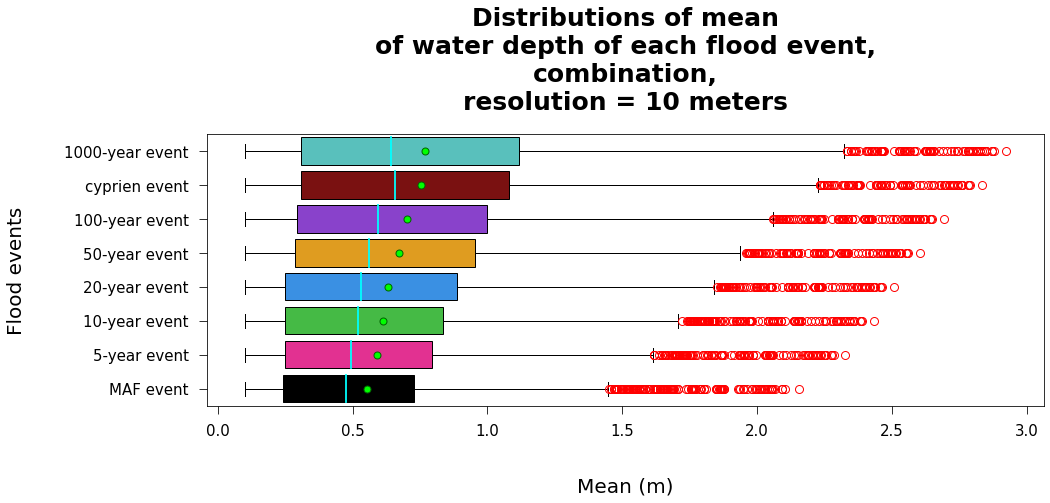

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "mean\nof water depth of each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'mean',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\mean_event.png', bbox_inches='tight', dpi=50)

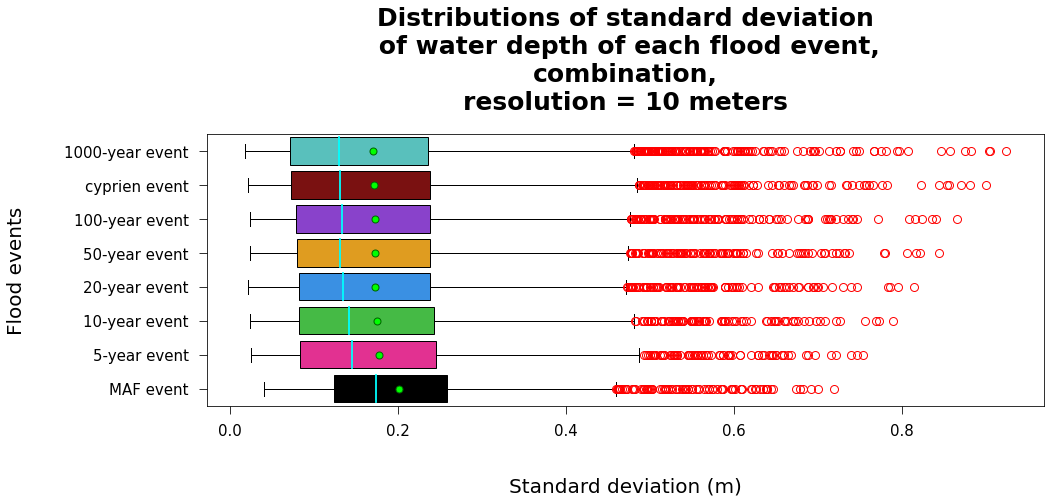

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "standard deviation\n of water depth of each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'sd',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\sd_event.png', bbox_inches='tight', dpi=dpi)

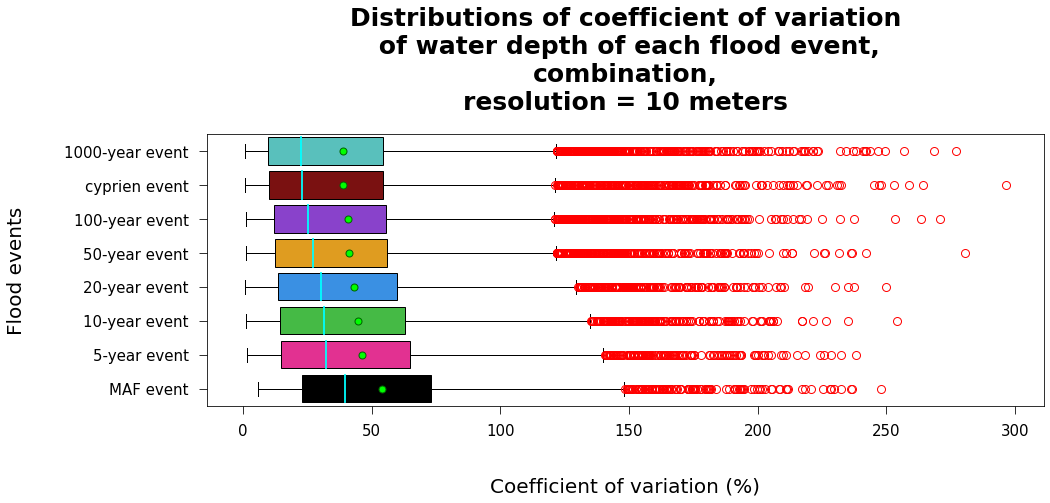

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "coefficient of variation\n of water depth of each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'cv',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\cv_event.png', bbox_inches='tight', dpi=dpi)

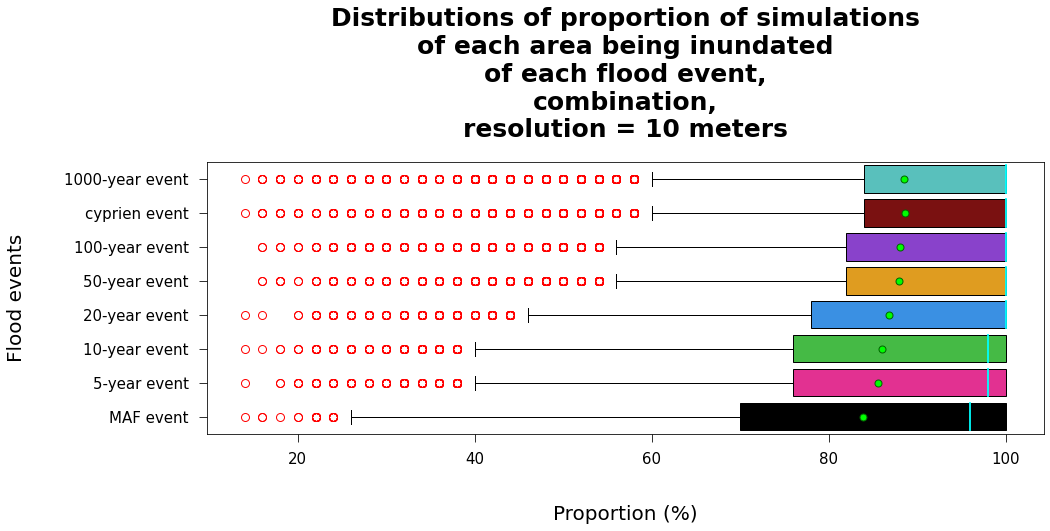

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "proportion of simulations\nof each area being inundated\nof each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'cell',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\cell_event.png', bbox_inches='tight', dpi=dpi)

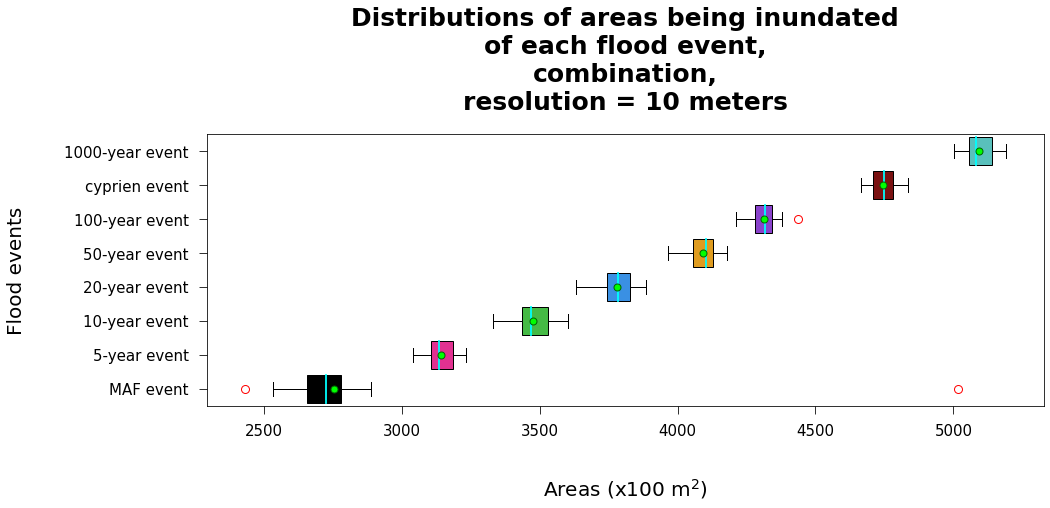

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "areas being inundated\nof each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'area',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\area_event.png', bbox_inches='tight', dpi=dpi)

In [65]:
def get_IQR_med(dataset, column):
    
    # Get interquartile range
    IQR = dataset[column].quantile(0.75) - dataset[column].quantile(0.25)
    
    # Get med
    median = dataset[column].median()
    
    # Get ratio of IQR/median
    ratio = IQR/median * 100
    
    return IQR, median, ratio

In [14]:
def get_cv(dataset, column):
    
    # Get sd
    sd = dataset[column].std()
    
    # Get mean
    mean = dataset[column].mean()
    
    # Get cv
    cv = sd/mean * 100
    
    return cv

In [68]:
int(event_comparison['area']['1000-year event'].mean())

509296

In [89]:
data_area_percentage = {
    
    'metrics': ['IQR/median (%)', 
                'coefficient of variation (%)', 
                'standard deviation (m)', 
                'mean (m)', 
                'interquartile range (m)', 
                'median (m)'],
    
    '1000-year event': [get_IQR_med(event_comparison['area'],'1000-year event')[2],
                        get_cv(event_comparison['area'],'1000-year event'), 
                        event_comparison['area']['1000-year event'].std(),
                        '{:.0f}'.format(event_comparison['area']['1000-year event'].mean()),
                        '{:.0f}'.format(get_IQR_med(event_comparison['area'],'1000-year event')[0]),
                        '{:.0f}'.format(get_IQR_med(event_comparison['area'],'1000-year event')[1])],
    
    'cyprien event': [get_IQR_med(event_comparison['area'],'cyprien event')[2],
                      get_cv(event_comparison['area'],'cyprien event'),
                      event_comparison['area']['cyprien event'].std(),
                      '{:.0f}'.format(event_comparison['area']['cyprien event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'cyprien event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'cyprien event')[1])],
    
    '100-year event': [get_IQR_med(event_comparison['area'],'100-year event')[2],
                       get_cv(event_comparison['area'],'100-year event'),
                       event_comparison['area']['100-year event'].std(),
                       '{:.0f}'.format(event_comparison['area']['100-year event'].mean()),
                       '{:.0f}'.format(get_IQR_med(event_comparison['area'],'100-year event')[0]),
                       '{:.0f}'.format(get_IQR_med(event_comparison['area'],'100-year event')[1])],
    
    '50-year event': [get_IQR_med(event_comparison['area'],'50-year event')[2],
                      get_cv(event_comparison['area'],'50-year event'),
                      event_comparison['area']['50-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['50-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'50-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'50-year event')[1])],
    
    '20-year event': [get_IQR_med(event_comparison['area'],'20-year event')[2],
                      get_cv(event_comparison['area'],'20-year event'),
                      event_comparison['area']['20-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['20-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'20-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'20-year event')[1])],
    
    '10-year event': [get_IQR_med(event_comparison['area'],'10-year event')[2],
                      get_cv(event_comparison['area'],'10-year event'),
                      event_comparison['area']['10-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['10-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'10-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'10-year event')[1])],
    
    '5-year event': [get_IQR_med(event_comparison['area'],'5-year event')[2],
                     get_cv(event_comparison['area'],'5-year event'),
                     event_comparison['area']['5-year event'].std(),
                     '{:.0f}'.format(event_comparison['area']['5-year event'].mean()),
                     '{:.0f}'.format(get_IQR_med(event_comparison['area'],'5-year event')[0]),
                     '{:.0f}'.format(get_IQR_med(event_comparison['area'],'5-year event')[1])],
    
    'MAF event': [get_IQR_med(event_comparison['area'],'MAF event')[2],
                  get_cv(event_comparison['area'],'MAF event'),
                  event_comparison['area']['MAF event'].std(),
                  '{:.0f}'.format(event_comparison['area']['MAF event'].mean()),
                  '{:.0f}'.format(get_IQR_med(event_comparison['area'],'MAF event')[0]),
                  '{:.0f}'.format(get_IQR_med(event_comparison['area'],'MAF event')[1])]
}

In [107]:
data_area_percentage = {
    
    'metrics': ['IQR/median (%)', 
                'coefficient of variation (%)', 
                'standard deviation (m)', 
                'mean (m)', 
                'interquartile range (m)', 
                'median (m)'],
    
    'MAF event': [get_IQR_med(event_comparison['area'],'MAF event')[2],
                  get_cv(event_comparison['area'],'MAF event'),
                  event_comparison['area']['MAF event'].std(),
                  '{:.0f}'.format(event_comparison['area']['MAF event'].mean()),
                  '{:.0f}'.format(get_IQR_med(event_comparison['area'],'MAF event')[0]),
                  '{:.0f}'.format(get_IQR_med(event_comparison['area'],'MAF event')[1])],
    
    '5-year event': [get_IQR_med(event_comparison['area'],'5-year event')[2],
                     get_cv(event_comparison['area'],'5-year event'),
                     event_comparison['area']['5-year event'].std(),
                     '{:.0f}'.format(event_comparison['area']['5-year event'].mean()),
                     '{:.0f}'.format(get_IQR_med(event_comparison['area'],'5-year event')[0]),
                     '{:.0f}'.format(get_IQR_med(event_comparison['area'],'5-year event')[1])],
    
    '10-year event': [get_IQR_med(event_comparison['area'],'10-year event')[2],
                      get_cv(event_comparison['area'],'10-year event'),
                      event_comparison['area']['10-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['10-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'10-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'10-year event')[1])],
    
    '20-year event': [get_IQR_med(event_comparison['area'],'20-year event')[2],
                      get_cv(event_comparison['area'],'20-year event'),
                      event_comparison['area']['20-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['20-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'20-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'20-year event')[1])],
    
    '50-year event': [get_IQR_med(event_comparison['area'],'50-year event')[2],
                      get_cv(event_comparison['area'],'50-year event'),
                      event_comparison['area']['50-year event'].std(),
                      '{:.0f}'.format(event_comparison['area']['50-year event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'50-year event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'50-year event')[1])],
    
    '100-year event': [get_IQR_med(event_comparison['area'],'100-year event')[2],
                       get_cv(event_comparison['area'],'100-year event'),
                       event_comparison['area']['100-year event'].std(),
                       '{:.0f}'.format(event_comparison['area']['100-year event'].mean()),
                       '{:.0f}'.format(get_IQR_med(event_comparison['area'],'100-year event')[0]),
                       '{:.0f}'.format(get_IQR_med(event_comparison['area'],'100-year event')[1])],
    
    'cyprien event': [get_IQR_med(event_comparison['area'],'cyprien event')[2],
                      get_cv(event_comparison['area'],'cyprien event'),
                      event_comparison['area']['cyprien event'].std(),
                      '{:.0f}'.format(event_comparison['area']['cyprien event'].mean()),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'cyprien event')[0]),
                      '{:.0f}'.format(get_IQR_med(event_comparison['area'],'cyprien event')[1])],
    
    '1000-year event': [get_IQR_med(event_comparison['area'],'1000-year event')[2],
                        get_cv(event_comparison['area'],'1000-year event'), 
                        event_comparison['area']['1000-year event'].std(),
                        '{:.0f}'.format(event_comparison['area']['1000-year event'].mean()),
                        '{:.0f}'.format(get_IQR_med(event_comparison['area'],'1000-year event')[0]),
                        '{:.0f}'.format(get_IQR_med(event_comparison['area'],'1000-year event')[1])]
    
    
}

In [108]:
df_area_percentage = pd.DataFrame(data_area_percentage)
df_area_percentage

,metrics,MAF event,5-year event,10-year event,20-year event,50-year event,100-year event,cyprien event,1000-year event
0,IQR/median (%),4.409608,2.520338,2.738936,2.165874,1.748081,1.39613,1.526798,1.68274
1,coefficient of variation (%),12.199553,1.730255,1.86555,1.544923,1.307977,1.027778,0.996916,1.026903
2,standard deviation (m),33632.948192,5439.36671,6485.433915,5842.743624,5355.014434,4431.696593,4731.22541,5229.974831
3,mean (m),275690,314368,347642,378190,409412,431192,474586,509296
4,interquartile range (m),12025,7900,9500,8200,7175,6025,7250,8550
5,median (m),272700,313450,346850,378600,410450,431550,474850,508100


In [110]:
df_area_percentage.iloc[0][1:].to_numpy()

array([4.40960762742941, 2.52033817195725, 2.7389361395415883,
       2.165874273639725, 1.748081374101596, 1.3961302282470165,
       1.526797936190376, 1.6827396181853966], dtype=object)

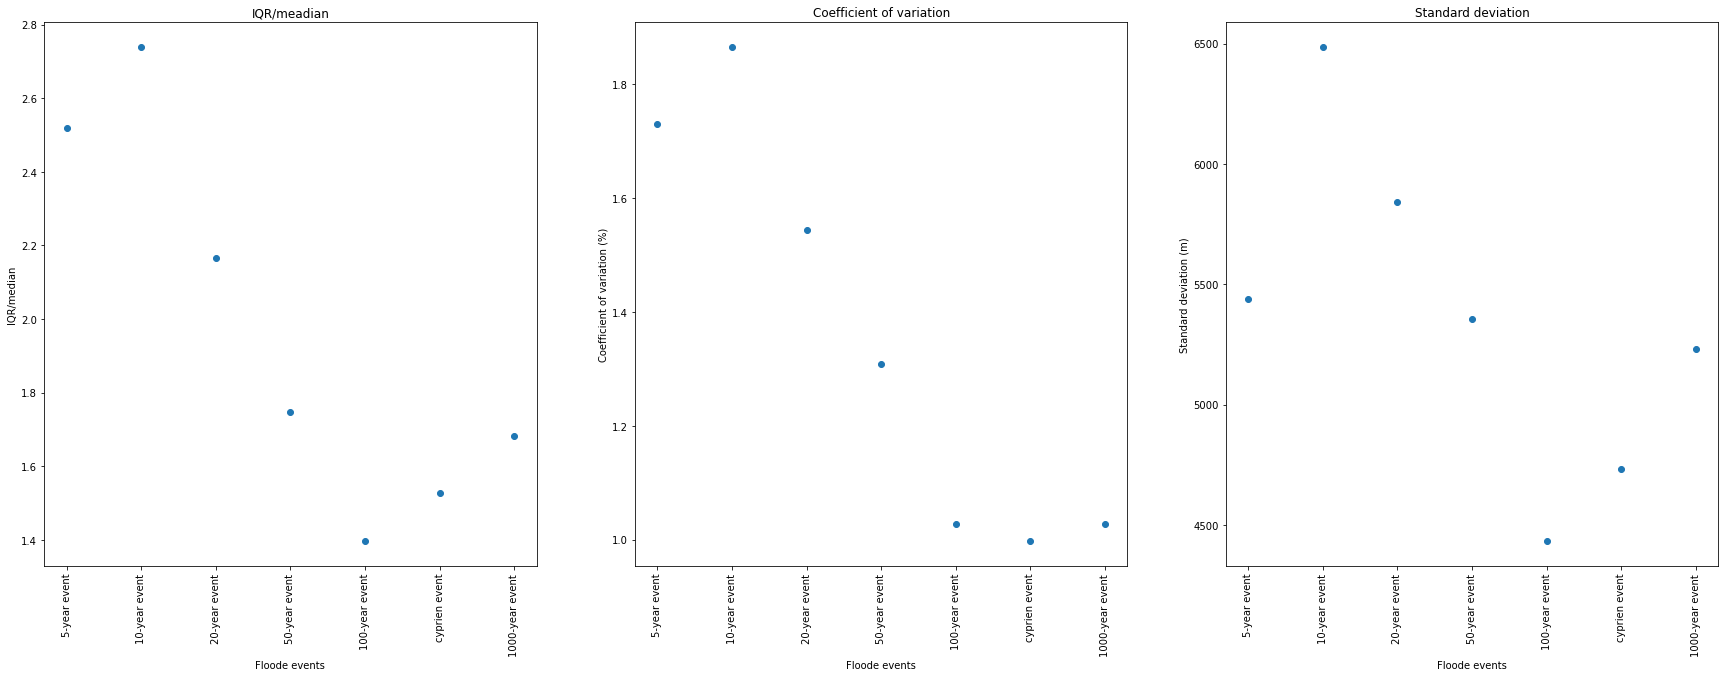

In [116]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))

ax1.scatter(df_area_percentage.columns[2:].to_numpy(), df_area_percentage.iloc[0][2:].to_numpy())
ax1.set_title('IQR/meadian')
ax1.set_xlabel(r'Floode events')
ax1.tick_params('x', rotation=90)
ax1.set_ylabel(r'IQR/median')

ax2.scatter(df_area_percentage.columns[2:].to_numpy(), df_area_percentage.iloc[1][2:].to_numpy())
ax2.set_title('Coefficient of variation')
ax2.set_xlabel(r'Floode events')
ax2.tick_params('x', rotation=90)
ax2.set_ylabel(r'Coefficient of variation (%)')

ax3.scatter(df_area_percentage.columns[2:].to_numpy(), df_area_percentage.iloc[2][2:].to_numpy())
ax3.set_title('Standard deviation')
ax3.set_xlabel(r'Floode events')
ax3.tick_params('x', rotation=90)
ax3.set_ylabel(r'Standard deviation (m)')

fig.savefig(r"S:\\LISFLOOD\\area\\area_noMAF.png", bbox_inches='tight', dpi=300)

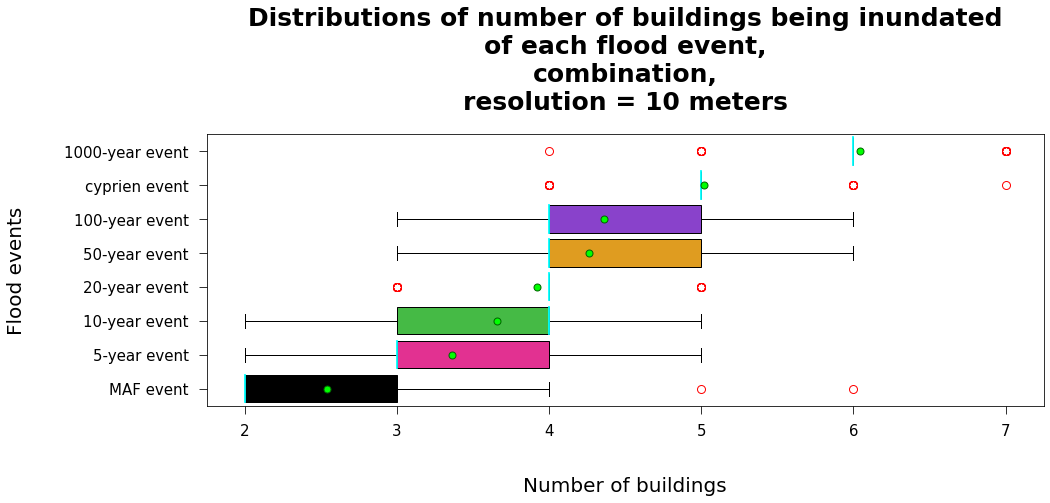

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
boxplots(
    event_comparison,
    ax,
    "number of buildings being inundated\nof each flood event,\ncombination,\nresolution = 10 meters",
    comparison_type_transform,
    'building',
    boxplot_color_dict
)

plt.savefig(r'S:\\LISFLOOD\\boxplot\\event\\building_event.png', bbox_inches='tight', dpi=dpi)

-------------------------------------------------------------------------------------------------------------------------------

# Flood event - density

In [21]:
color_list_transform = [
    'mediumturquoise', 
    'darkred', 
    'blueviolet', 
    'orange', 
    'dodgerblue', 
    'limegreen', 
    'deeppink',
    'black'
]

dpi=300

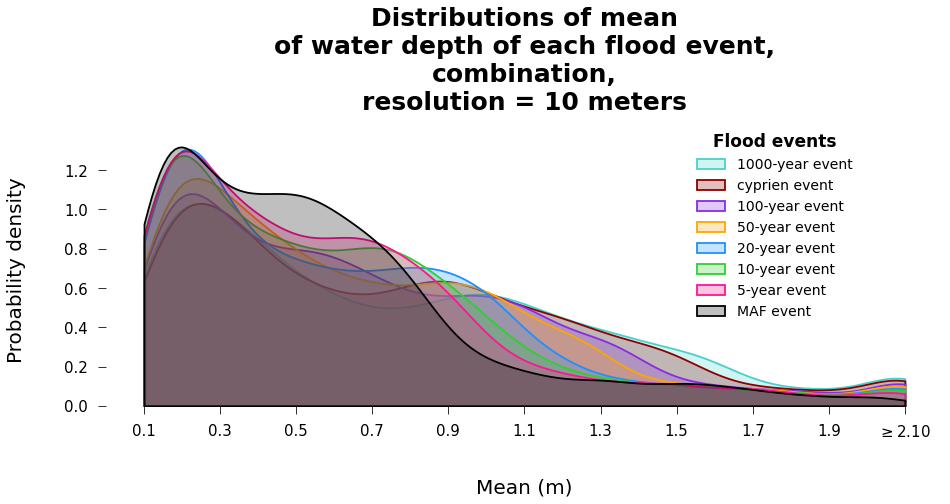

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'mean'

kdeplots(
    event_comparison,
    ax,
    f"{calculation_option}\nof water depth of each flood event,\ncombination,\nresolution = 10 meters",
    [0.1, 2.10001, 0.2],
    comparison_type_transform,
    (0.7, 0.3),
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\event\\{calculation_option}_event.png', bbox_inches='tight', dpi=dpi)

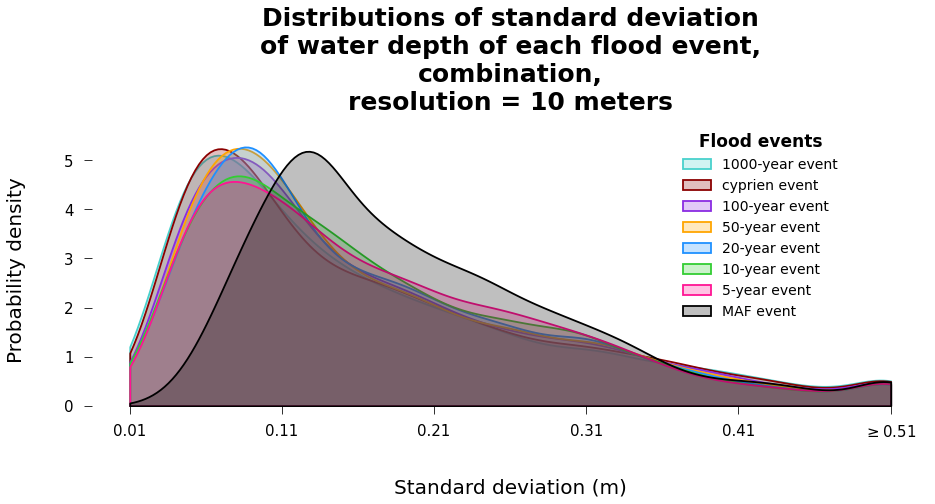

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'sd'

kdeplots(
    event_comparison,
    ax,
    f"standard deviation\nof water depth of each flood event,\ncombination,\nresolution = 10 meters",
    [0.01, 0.510001, 0.1],
    comparison_type_transform,
    (0.7, 0.3),
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\event\\{calculation_option}_event.png', bbox_inches='tight', dpi=dpi)

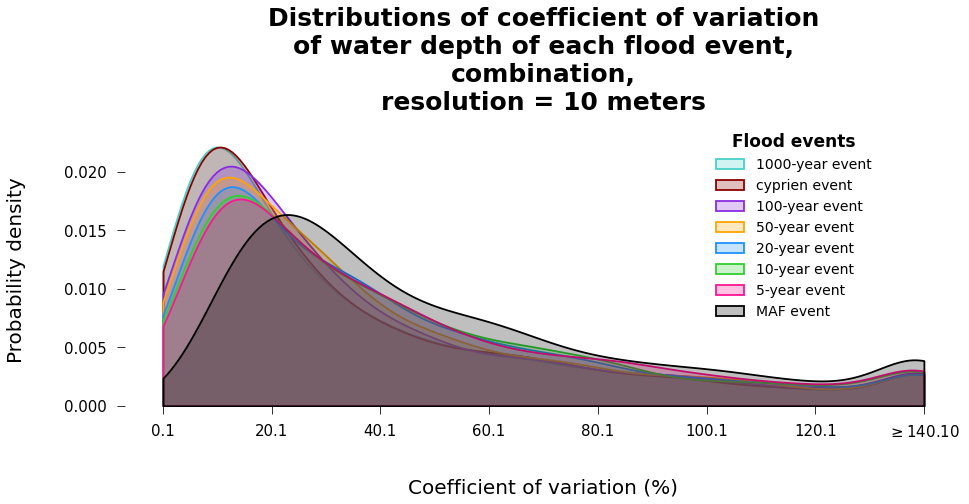

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cv'

kdeplots(
    event_comparison,
    ax,
    f"coefficient of variation\nof water depth of each flood event,\ncombination,\nresolution = 10 meters",
    [0.1, 140.10001, 20],
    comparison_type_transform,
    (0.7, 0.3),
    calculation_option,
    color_list_transform,
    r'$\geq $'
)

plt.savefig(fr'{path_density}\\event\\{calculation_option}_event.png', bbox_inches='tight', dpi=dpi)

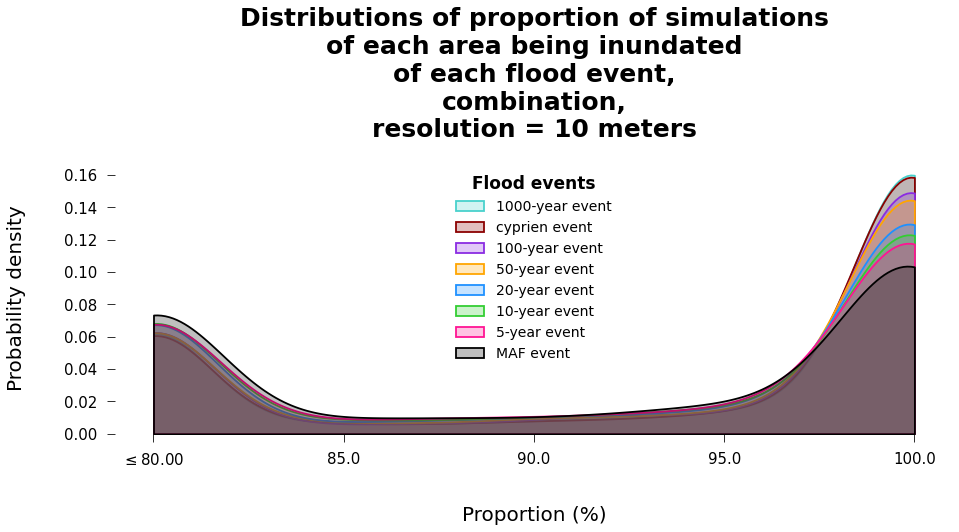

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))

calculation_option = 'cell'

kdeplots(
    event_comparison,
    ax,
    f"proportion of simulations\nof each area being inundated\nof each flood event,\ncombination,\nresolution = 10 meters",
    [80, 100.0001, 5],
    comparison_type_transform,
    "upper center",
    calculation_option,
    color_list_transform,
    r'$\leq $'
)

plt.savefig(fr'{path_density}\\event\\{calculation_option}_event.png', bbox_inches='tight', dpi=dpi)

-------------------------------------------------------------------------------------------------------------------------------

# Areas of transformation types - scatterplot

In [ ]:
# file_list = [
#     r"S:\\LISFLOOD\\version_17\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
#     r"S:\\LISFLOOD\\version_8\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv",
#     r"S:\\LISFLOOD\\version_9\\7_results\\un_combination\\uncom_csv\\un_combined_file_1.csv"
# ][::-1]

# impact_version_list = [
#     r"S:\\LISFLOOD\\version_17\\7_results\\un_combination\\uncom_one_polygon",
#     r"S:\\LISFLOOD\\version_8\\7_results\\un_combination\\uncom_one_polygon",
#     r"S:\\LISFLOOD\\version_9\\7_results\\un_combination\\uncom_one_polygon"
# ][::-1]


# resolution_list = [10, 10, 10][::-1]

# name = [
#     'rotation',
#     'east translation',
#     'north translation'
# ][::-1]

# resolution_datasets = get_datalist(
#     file_list,
#     "c",
#     resolution_list,
#     0.1,
#     building_path,
#     impact_version_list
# )

In [ ]:
# resolution_comparison = statistic_df_dict(
#     name,
#     resolution_datasets,
#     -999
# )

In [ ]:
# boxplot_color_dict = {"north translation": 'blueviolet',
#                       "east translation": 'orange',
#                       "rotation": 'darkgreen'}

# comparison_type_transform = 'Transformations'
# dpi=300

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 5))
# boxplots(
#     resolution_comparison,
#     ax,
#     "areas being inundated",
#     comparison_type_transform,
#     'area',
#     boxplot_color_dict,
#     True
# )

# plt.savefig(fr'{path_boxplot}\\scatterplot\\areas_scatterplot.png', bbox_inches='tight', dpi=dpi)